# Fetch Rewards Coding Exercise - Data Analyst

The sample Fetch Rewards data are in 3 files in the JSON Lines format. Those files are:
1) Brands
2) Users
3) Receipts

In this notebook, I have created relational database design and implemented it one schema, the ER diagram of which is attached in the submission. The entire table after performing certain transformations.As a last step to work on the queries, I imported the created tables to MySQL Server. 

In [1]:
#loading the libraries packages
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Brands Data:

In [2]:
#Reading input source file(.json) after unzip
brands_file = pd.read_json('/Users/vamshireddyveramareddy/Desktop/data/brands.json',lines=True)
brands_file

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves


In [3]:
# Formatting source file using a loop function
brands = []
# Open the file
with open('/Users/vamshireddyveramareddy/Desktop/data/brands.json') as f:
    for line in f:
        brands.append(json.loads(line))
# Conversion of 
brands_df = pd.json_normalize(brands)

In [4]:
# Rename columns for clarity
brands_df.rename(columns={'_id.$oid': 'id', 'cpg.$id.$oid': 'cpg', 'cpg.$ref': 'ref'}, inplace=True)

In [5]:
brands_df.head()

,barcode,category,categoryCode,name,topBrand,id,cpg,ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


In [6]:
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   barcode       1167 non-null   object
 1   category      1012 non-null   object
 2   categoryCode  517 non-null    object
 3   name          1167 non-null   object
 4   topBrand      555 non-null    object
 5   id            1167 non-null   object
 6   cpg           1167 non-null   object
 7   ref           1167 non-null   object
 8   brandCode     933 non-null    object
dtypes: object(9)
memory usage: 82.2+ KB


In [7]:
#Duplicate Check
brands_df.duplicated().sum()

0

In [8]:
#Checking for null values
brands_df.isnull().sum()

barcode           0
category        155
categoryCode    650
name              0
topBrand        612
id                0
cpg               0
ref               0
brandCode       234
dtype: int64

In [9]:
# Checking for the number of missing values in each column
brands_df.nunique()

barcode         1160
category          23
categoryCode      14
name            1156
topBrand           2
id              1167
cpg              196
ref                2
brandCode        897
dtype: int64

In [10]:
#Check missing value
brands_na = brands_df.isna().sum()
brands_na/len(brands_df)

barcode         0.000000
category        0.132819
categoryCode    0.556984
name            0.000000
topBrand        0.524422
id              0.000000
cpg             0.000000
ref             0.000000
brandCode       0.200514
dtype: float64

In [11]:
brands_df["category"].unique()

array(['Baking', 'Beverages', 'Candy & Sweets', 'Condiments & Sauces',
       'Canned Goods & Soups', nan, 'Magazines', 'Breakfast & Cereal',
       'Beer Wine Spirits', 'Health & Wellness', 'Beauty', 'Baby',
       'Frozen', 'Grocery', 'Snacks', 'Household', 'Personal Care',
       'Dairy', 'Cleaning & Home Improvement', 'Deli',
       'Beauty & Personal Care', 'Bread & Bakery', 'Outdoor',
       'Dairy & Refrigerated'], dtype=object)

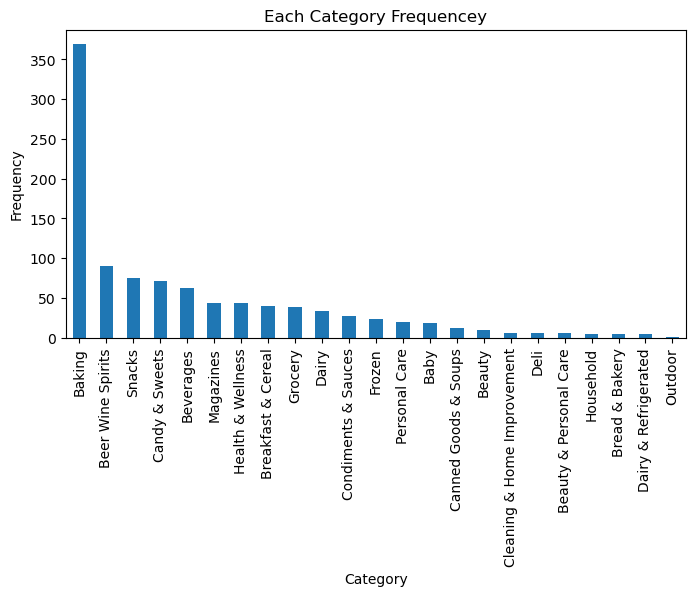

In [12]:
brands_category_counts = brands_df['category'].value_counts()
plt.figure(figsize=(8,4)) 
brands_category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Each Category Frequencey')
plt.xticks(rotation=90)  
plt.show()

In [13]:
brands_categoryfreq= 100* (brands_df['category'].value_counts() / len(brands_df))  
print (brands_categoryfreq.map('{:,.2f}%' .format))

Baking                         31.62%
Beer Wine Spirits               7.71%
Snacks                          6.43%
Candy & Sweets                  6.08%
Beverages                       5.40%
Magazines                       3.77%
Health & Wellness               3.77%
Breakfast & Cereal              3.43%
Grocery                         3.34%
Dairy                           2.83%
Condiments & Sauces             2.31%
Frozen                          2.06%
Personal Care                   1.71%
Baby                            1.54%
Canned Goods & Soups            1.03%
Beauty                          0.77%
Cleaning & Home Improvement     0.51%
Deli                            0.51%
Beauty & Personal Care          0.51%
Household                       0.43%
Bread & Bakery                  0.43%
Dairy & Refrigerated            0.43%
Outdoor                         0.09%
Name: category, dtype: object


<Axes: xlabel='category', ylabel='count'>

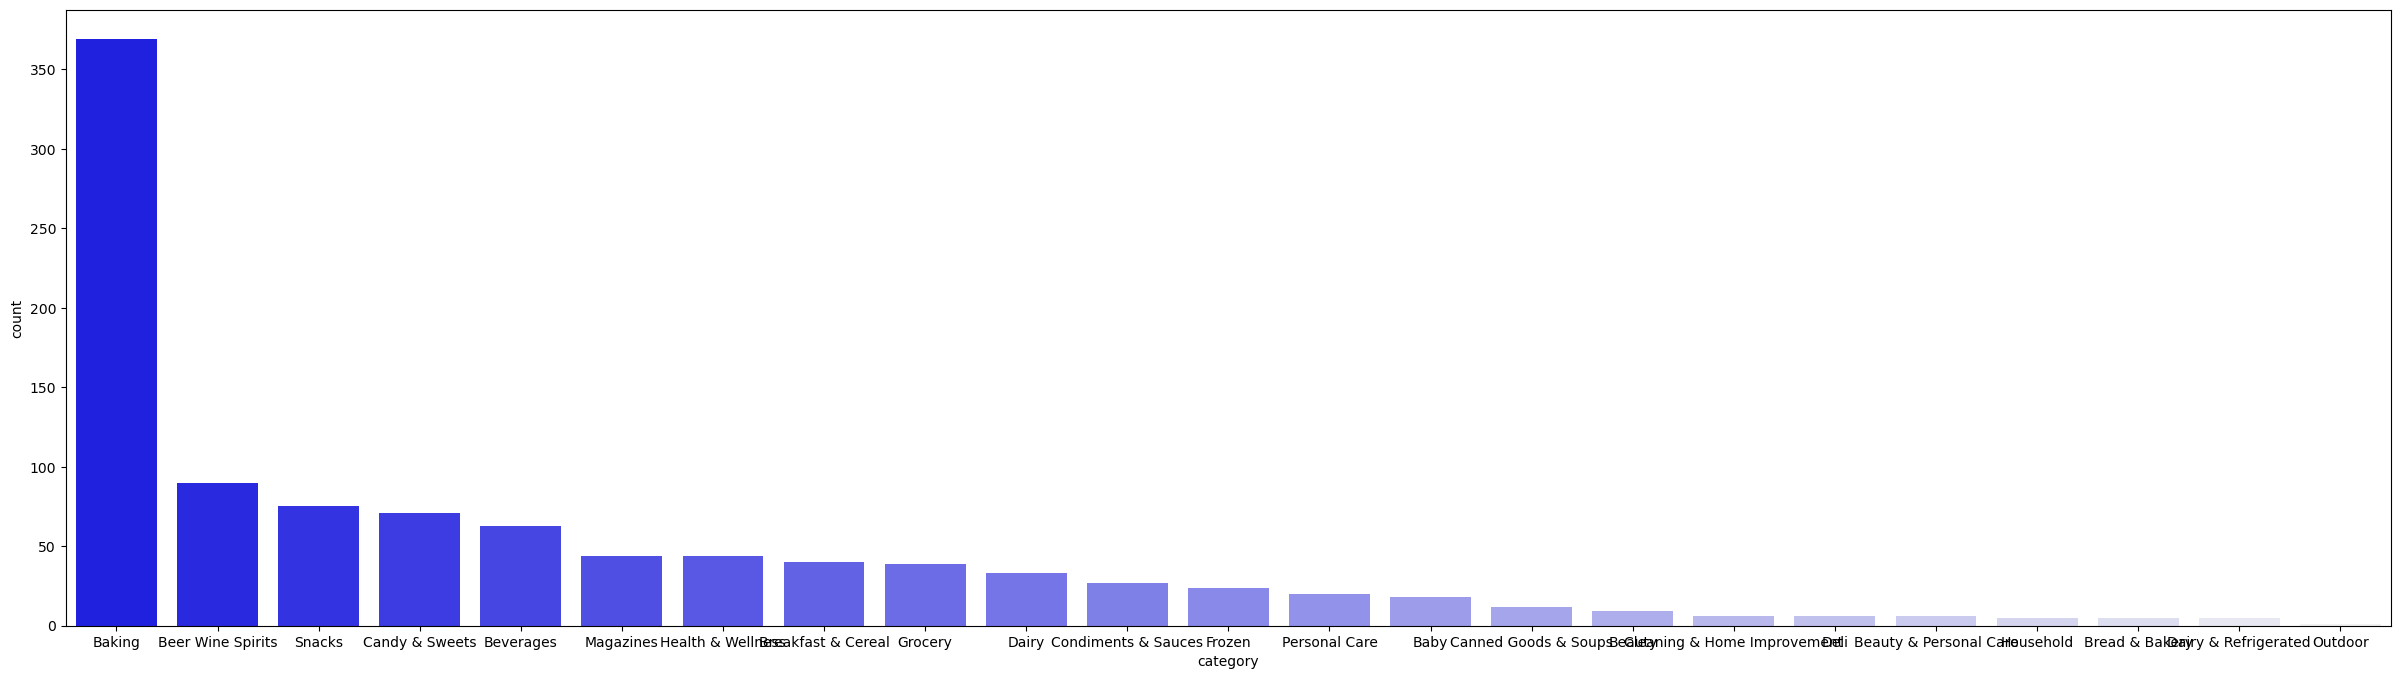

In [14]:
category_prop = brands_df['category'].value_counts().reset_index()
category_prop.rename(columns={'index': 'category', 'category': 'count'}, inplace=True)
# Generate a color palette with decreasing brightness
base_color = 'blue'
n_categories = len(category_prop)
color_palette = sns.light_palette(base_color, n_colors=n_categories, reverse=True)

plt.figure(figsize=(30, 8))
sns.barplot(x='category', y='count', data=category_prop, palette=color_palette)

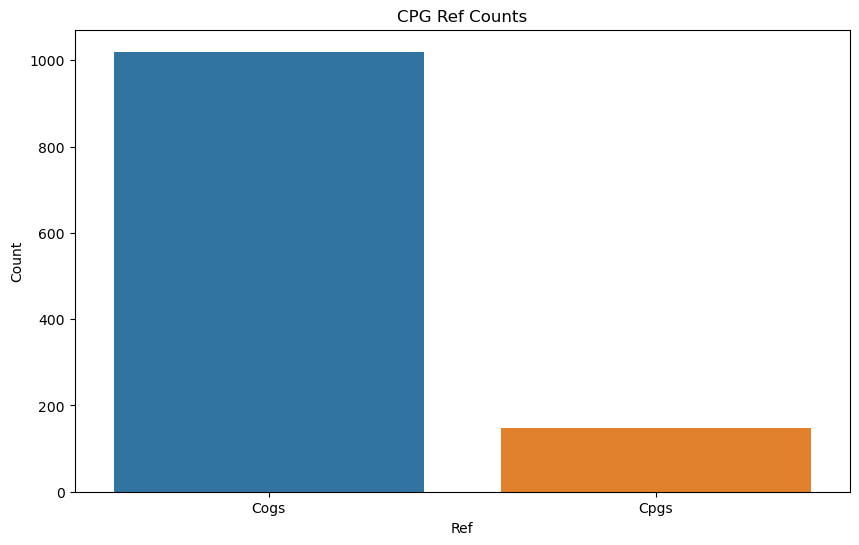

In [15]:
# Create a DataFrame with the value counts of 'cpg_ref'
cpg_ref_counts = pd.DataFrame(brands_df['ref'].value_counts())

# Reset the index and rename the columns
cpg_ref_counts.reset_index(inplace=True)
cpg_ref_counts.rename(columns={'index': 'ref', 'ref': 'count'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ref', y='count', data=cpg_ref_counts)

# Add labels and title
plt.xlabel('Ref')
plt.ylabel('Count')
plt.title('CPG Ref Counts')

# Show the plot
plt.show()

## Brands Data Quality Issues:

1. Wrong Data Type Issues.
2. Missing Data Values(categoryCode, topBrand, brandCode, category)
3. The presence of class imbalance in 'category' and 'cpg_ref' should be taken into account for further analysis or model development.

## 2. Users Data:

In [16]:
# Formatting source file using a loop function
users = []
with open('/Users/vamshireddyveramareddy/Desktop/data/users.json') as f:
    for line in f:
        users.append(json.loads(line))
users_df = pd.json_normalize(users)

In [17]:
users_df.head()

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,1609687530554,1.609688e+12
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12


In [18]:
# Rename columns
users_df.rename(columns={'_id.$oid': 'id', 'createdDate.$date': 'createddate', 'lastLogin.$date': 'lastlogin'},
                inplace=True)

In [19]:
# Changing columns to datetime
for col in ['createddate', 'lastlogin']:
    users_df[col] = pd.to_datetime(users_df[col].apply(lambda x: eval(x)['$date']) 
                                   if users_df[col].dtype == '0' else users_df[col])


In [20]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   active        495 non-null    bool          
 1   role          495 non-null    object        
 2   signUpSource  447 non-null    object        
 3   state         439 non-null    object        
 4   id            495 non-null    object        
 5   createddate   495 non-null    datetime64[ns]
 6   lastlogin     433 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 23.8+ KB


In [21]:
#Duplicate Check
users_df.duplicated().sum()

283

In [22]:
#droping duplicates
users_df.drop_duplicates(inplace=True)
users_df.duplicated().sum()

0

In [23]:
#Checking for null values
users_df.isnull().sum()

active           0
role             0
signUpSource     5
state            6
id               0
createddate      0
lastlogin       40
dtype: int64

In [24]:
users_na = users_df.isna().sum()
users_na/len(users_df)

active          0.000000
role            0.000000
signUpSource    0.023585
state           0.028302
id              0.000000
createddate     0.000000
lastlogin       0.188679
dtype: float64

In [25]:
# Count of unique values in each column
users_df.nunique()

active            2
role              2
signUpSource      2
state             8
id              212
createddate     212
lastlogin       172
dtype: int64

<Axes: xlabel='active', ylabel='count'>

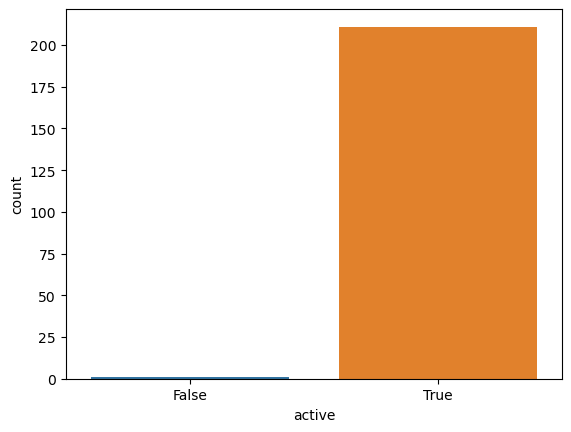

In [26]:
users_active = users_df['active'].value_counts().reset_index()
users_active.rename(columns={'index': 'active', 'active': 'count'}, inplace=True)
sns.barplot(x='active', y='count', data=users_active)

In [27]:
users_signupsource = pd.DataFrame(users_df.signUpSource.value_counts())
users_signupsource

,signUpSource
Email,204
Google,3


In [28]:
freq_signUpSource= 100* (users_df['signUpSource'].value_counts() / len(users)) 
print (freq_signUpSource.map('{:,.2f} %'.format))

Email     41.21 %
Google     0.61 %
Name: signUpSource, dtype: object


<Axes: xlabel='state', ylabel='count'>

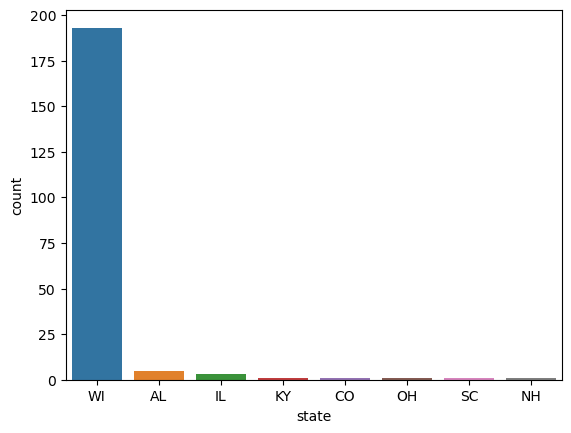

In [29]:
users_state= users_df['state'].value_counts().reset_index() 
users_state.rename(columns={'index': 'state', 'state': 'count'}, inplace=True)
sns.barplot(x='state', y='count', data=users_state)

In [30]:
freq_state= 100* (users_df['state'].value_counts() / len(users)) 
print (freq_state.map('{:,.2f} %'.format))

WI    38.99 %
AL     1.01 %
IL     0.61 %
KY     0.20 %
CO     0.20 %
OH     0.20 %
SC     0.20 %
NH     0.20 %
Name: state, dtype: object


## Users Data Quality Issues:

1. Wrong Data Type Issues.
2. Missing Data Values(categoryCode, topBrand, brandCode, category)
3. Duplicate values(283 rowsthat's more than half of the given dataset).
4. The presence of class imbalance in 'active' and 'states' should be taken into account for further analysis or model development.

## 3. Receipts Data:

In [92]:
# Formatting source file using a loop function
r = []
with open('/Users/vamshireddyveramareddy/Desktop/data/receipts.json') as f:
    for line in f:
        r.append(json.loads(line))
receipts= pd.json_normalize(r)

In [93]:
receipts.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,1.609601e+12


In [127]:
# Rename columns
receipts.rename(columns={'createDate.$date': 'createDate', 'dateScanned.$date': 'dateScanned',
                            'finishedDate.$date': 'finishedDate', 'modifyDate.$date': 'modifyDate', 
                            'pointsAwardedDate.$date': 'pointsAwardedDate', 'purchaseDate.$date': 'purchaseDate'},
                inplace=True)

In [128]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bonusPointsEarned        544 non-null    float64
 1   bonusPointsEarnedReason  544 non-null    object 
 2   pointsEarned             609 non-null    object 
 3   purchasedItemCount       635 non-null    float64
 4   rewardsReceiptItemList   679 non-null    object 
 5   rewardsReceiptStatus     1119 non-null   object 
 6   totalSpent               684 non-null    object 
 7   userId                   1119 non-null   object 
 8   _id.$oid                 1119 non-null   string 
 9   createDate               1119 non-null   int64  
 10  dateScanned              1119 non-null   int64  
 11  finishedDate             568 non-null    float64
 12  modifyDate               1119 non-null   int64  
 13  pointsAwardedDate        537 non-null    float64
 14  purchaseDate            

In [129]:
#Check missing value
receipts.isna().sum()/len(receipts)

bonusPointsEarned          0.513852
bonusPointsEarnedReason    0.513852
pointsEarned               0.455764
purchasedItemCount         0.432529
rewardsReceiptItemList     0.393208
rewardsReceiptStatus       0.000000
totalSpent                 0.388740
userId                     0.000000
_id.$oid                   0.000000
createDate                 0.000000
dateScanned                0.000000
finishedDate               0.492404
modifyDate                 0.000000
pointsAwardedDate          0.520107
purchaseDate               0.400357
is_modified                0.000000
dtype: float64

In [130]:
# Since nunique() is cannot be applied on lists, we first identify columns that are of type "list"
# Identify column with of type list, (Identify unhashable column)
list_columns = []
for col in receipts.columns:
    non_nulls = receipts[col].dropna()
    if len(non_nulls) > 0:
        first_element = non_nulls.iloc[0]
        if isinstance(first_element, list):
            list_columns.append(col)

print(list_columns)

['rewardsReceiptItemList']


In [131]:
#No "Accepted" status in rewardsReceiptstatus column

In [132]:
# Identify unique categorical variables
receipts.rewardsReceiptStatus.unique()

array(['FINISHED', 'REJECTED', 'FLAGGED', 'SUBMITTED', 'PENDING'],
      dtype=object)

In [133]:
check = receipts.copy()
check['rewardsReceiptItemList'] = check['rewardsReceiptItemList'].apply(lambda x: str(x))
print("Number of duplicate columns in receipts dataframe:",check.duplicated().sum())

Number of duplicate columns in receipts dataframe: 0


## Recepits Data Quality Issues:

1. Wrong Data Type Issues.
2. Missing Data Values(more than half of the given dataset).
4. The presence of class imbalance in 'rewardsReceiptStatus' should be taken into account for further analysis or model development.

  # Communicate with Stakeholders

Hi team,

This is Charlene from the Data team.

After reviewing the users, brands, and receipts data, I would like to discuss some issues and potential solutions with you:

Data Transformation: The current data structure is not optimal for analysis and visualization purposes. I propose automating the process of transforming the data into tables, which will improve efficiency for future analysis.

Duplicate User Records: I observed duplicated user records in the users data. For example, user_id '54943462e4b07e684157a532' appears 20 times with the same login time and date. I suggest arranging a meeting with the engineering team to investigate whether this duplication is a system-related issue.

Missing Values: The receipts data, in particular, contains missing values. For instance, the brandCode field is often not recorded. To ensure accurate brand rankings, it is essential to capture all relevant data. Currently, I am performing the analysis by disregarding these missing values. I would appreciate your input on how best to handle this situation.

I will delve into the details during our upcoming weekly meeting and look forward to hearing your insights. If you are unable to attend, I will share the meeting notes afterwards.

Best regards,

Charlene